# Model Misspecification

For instance, we may assume that the dependent variable is a linear function of two independent variables. If the model is not correctly specified, regression assumptions will be violated and the model will not be accurate. Below we define and explain many of the common model specification errors.

# Exclusion of important variables

If we omit a variable which is uncorrelated with the variables that we do include, we will simply not explain the dependent variable as well as we could. However, if the omitted variable (say, $X_2$) is correlated with the included variable ($X_1$), then the omission additionally affects the model. The coefficient of $X_1$ and the constant term in the regression will be biased by trying to compensate for the omission of $X_2$. This can lead us to overestimate the effect of $X_1$ on the dependent variable. Also, estimated values of the coefficients and the estimated standard errors will be inconsistent.

In particular, we may be led to believe that two variables have a causal relationship because of their high correlation, when in fact they are both caused by a third. For instance, if two stocks both follow the market, or two quantities both tend to increase with time, they will be highly correlated. 

R-squared values of linear regression
LRCX and AAPL:  0.920633448032
LRCX and SPY:  0.88185329246
AAPL and SPY:  0.824172499467


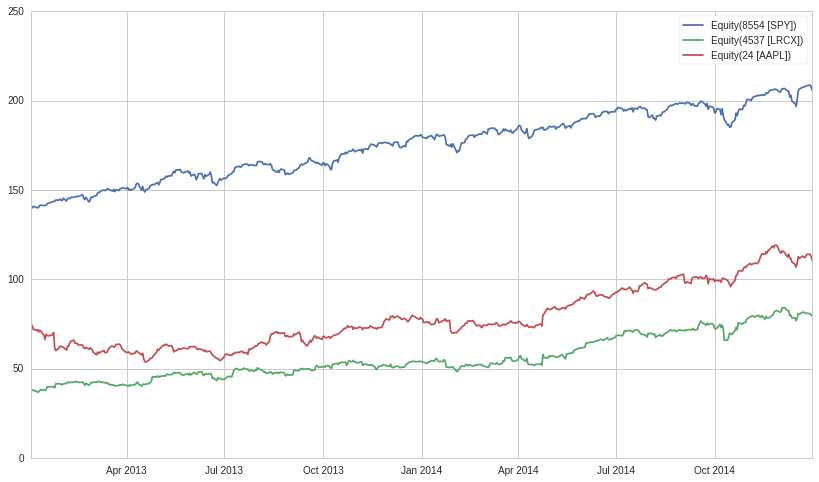

In [3]:
# Pull the pricing data for our two stocks and S&P 500
start = '2013-01-01'
end = '2015-01-01'
bench = get_pricing('SPY', fields='price', start_date=start, end_date=end) #S&P 500
a1 = get_pricing('LRCX', fields='price', start_date=start, end_date=end) #Lam Research
a2 = get_pricing('AAPL', fields='price', start_date=start, end_date=end) #Apple

# Perform linear regression and print R-squared values
slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()
print "R-squared values of linear regression"
print "LRCX and AAPL: ", slr12.rsquared
print "LRCX and SPY: ", slrb1.rsquared
print "AAPL and SPY: ", slrb2.rsquared

plt.plot(bench)
plt.plot(a1)
plt.plot(a2)
plt.legend()

It's hard to see consistency, or lack of it, since it is asymptotic and probabilistic. However, we can extend our sample period to see how the R-squared value changes. The correlation between the stocks and the market seems to persist, while the correlation between the two stocks drops. So we would be better off predicting the stock prices from the market price than from each other.

R-squared values of linear regression
LRCX and AAPL:  0.530905362926
LRCX and SPY:  0.737620243278
AAPL and SPY:  0.793107070407


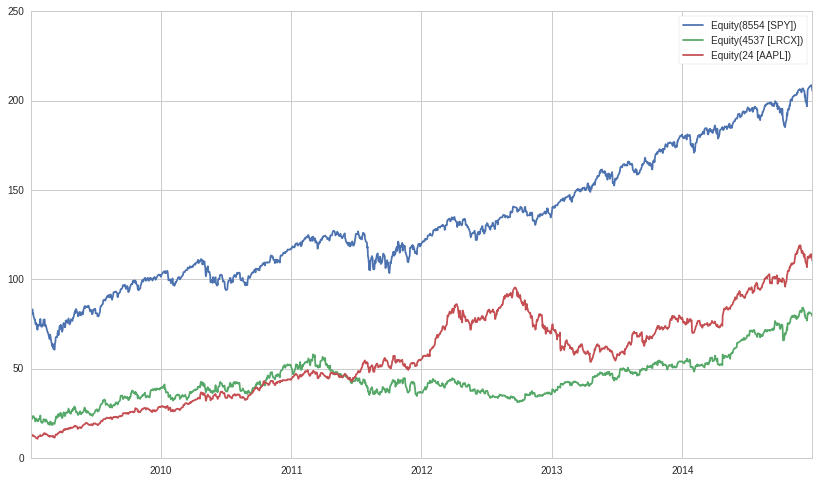

In [4]:
# Pull pricing data from further back
start = '2009-01-01'
end = '2015-01-01'
bench = get_pricing('SPY', fields='price', start_date=start, end_date=end)
a1 = get_pricing('LRCX', fields='price', start_date=start, end_date=end)
a2 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)

# Perform linear regression and print R-squared values
slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()
print "R-squared values of linear regression"
print "LRCX and AAPL: ", slr12.rsquared
print "LRCX and SPY: ", slrb1.rsquared
print "AAPL and SPY: ", slrb2.rsquared

plt.plot(bench)
plt.plot(a1)
plt.plot(a2)
plt.legend()

The best way to avoid this issue is to choose the independent variables which you have reason to believe will be good predictors of the dependent variable before starting the regression analysis. "Before" is key: it's important not to pick variables just based on how good the regression analysis looks because that leads to overfitting.

# Inclusion of unnecessary variables

Conversely, we can have a model which includes too many independent variables. If we include a truly unnecessary variable, we will have a lower adjusted R-squared and less precise estimates of the other regression coefficients. That is, our analysis of the model will be weakened, but the model itself will not change.

If we include variables that are only mostly irrelevant, however, we can artificially improve the fit and the R-squared of our model by adding bits of the slightly-correlated variables to conform to the sample data. This runs the risk of overfitting, since the small adjustments we make are sample-specific. For example, below we run a regression with PEP price as the independent variable and PG price as the dependent variable (which makes some sense as they are in the same sector) and then run another regression with three random other stocks added in.

SLR R-squared: 0.714538080242
MLR R-squared: 0.888347333447


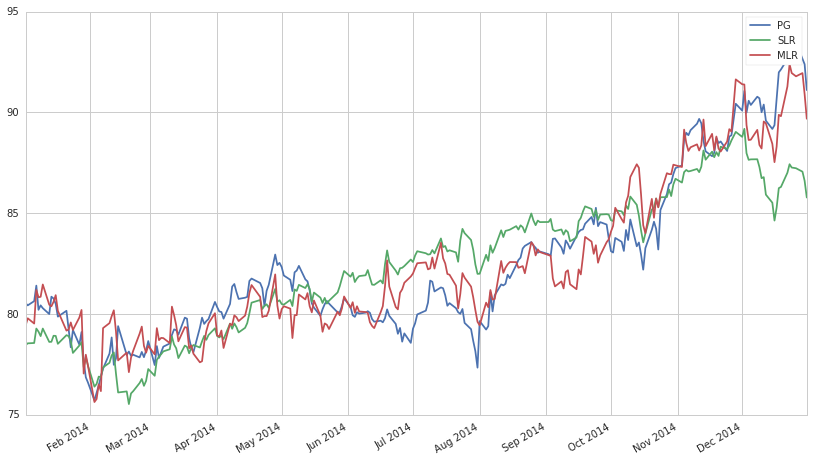

In [4]:
# Load one year's worth of pricing data for five different assets
start = '2014-01-01'
end = '2015-01-01'
x1 = get_pricing('PEP', fields='price', start_date=start, end_date=end) #Pepsico
x2 = get_pricing('MCD', fields='price', start_date=start, end_date=end) #McDonald's
x3 = get_pricing('ATHN', fields='price', start_date=start, end_date=end) #Athenahealth
x4 = get_pricing('DOW', fields='price', start_date=start, end_date=end) #Dow Jones Industrial Average
y = get_pricing('PG', fields='price', start_date=start, end_date=end) #Procter & Gamble

# Build a linear model using only x1 to explain y
slr = regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
slr_prediction = slr.params[0] + slr.params[1]*x1

# Run multiple linear regression using x1, x2, x3, x4 to explain y
mlr = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
mlr_prediction = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

# Compute adjusted R-squared for the two different models
print 'SLR R-squared:', slr.rsquared_adj
print 'MLR R-squared:', mlr.rsquared_adj

# Plot y along with the two different predictions
y.plot()
slr_prediction.plot()
mlr_prediction.plot()
plt.legend(['PG', 'SLR', 'MLR']);

We are able to tune the model with more variables more precisely to the data. Note that although adjusted R-squared penalizes us for using more variables, the number of samples here is so large that the adjustment is tiny. Let's see what happens if we use the same linear models to predict the price of PG for the next six months:

SLR R-squared: -0.742493773006
MLR R-squared: -1.74144128938


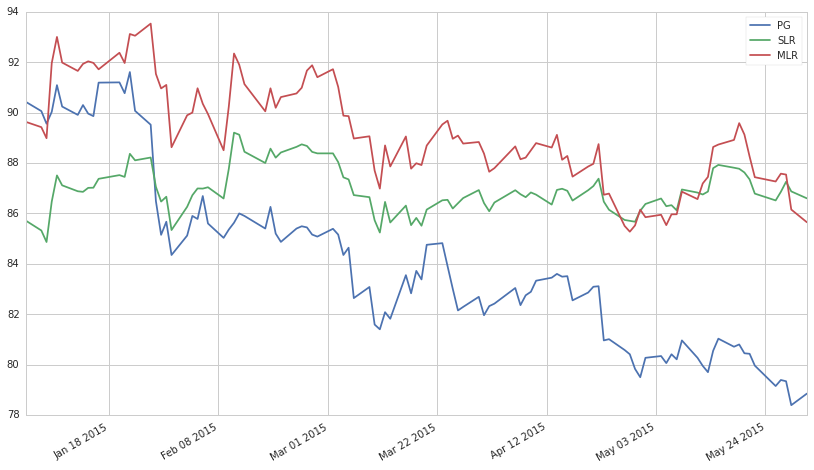

In [5]:
# Load a year and a half of pricing data
start = '2015-01-01'
end = '2015-06-01'
x1 = get_pricing('PEP', fields='price', start_date=start, end_date=end)
x2 = get_pricing('MCD', fields='price', start_date=start, end_date=end)
x3 = get_pricing('ATHN', fields='price', start_date=start, end_date=end)
x4 = get_pricing('DOW', fields='price', start_date=start, end_date=end)
y = get_pricing('PG', fields='price', start_date=start, end_date=end)

# Extend our model from before to the new time period
slr_prediction2 = slr.params[0] + slr.params[1]*x1
mlr_prediction2 = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

# Compute adjusted R-squared over the extended time period
adj = float(len(y) - 1)/(len(y) - 5) # Compute adjustment factor
SST = sum((y - np.mean(y))**2)
SSRs = sum((slr_prediction2 - y)**2)
print 'SLR R-squared:', 1 - adj*SSRs/SST
SSRm = sum((mlr_prediction2 - y)**2)
print 'MLR R-squared:', 1 - adj*SSRm/SST

# Plot y along with the two different predictions
y.plot()
slr_prediction2.plot()
mlr_prediction2.plot()
plt.legend(['PG', 'SLR', 'MLR']);

Now both models are performing rather poorly - that is, they do not hold up out of sample - but in particular the model from the multiple linear regression is now doing worse than the model from the single linear regression. Although this performance could have any number of causes, we should not be surprised since we have no reason to believe that, say, Athena Health stock has actual explanatory power in this situation.